In [1]:
#importing packages
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os   
from zipfile import ZipFile
from data_API_downloader import Downloader
from region_splitter import Region_finder

In [7]:
cities = pd.read_csv("souradnice.csv")

In [8]:
cities.head()

,Obec,Kód obce,Okres,Kód okresu,Kraj,Kód kraje,PSČ,Latitude,Longitude
0,Abertamy,554979,Karlovy Vary,CZ0412,Karlovarský kraj,CZ041,36235,50.368855,12.818377
1,Adamov,535826,České Budějovice,CZ0311,Jihočeský kraj,CZ031,37371,49.000624,14.539603
2,Adamov,581291,Blansko,CZ0641,Jihomoravský kraj,CZ064,67904,49.295708,16.663955
3,Adamov,531367,Kutná Hora,CZ0205,Středočeský kraj,CZ020,28601,49.857917,15.409018
4,Adršpach,547786,Náchod,CZ0523,Královéhradecký kraj,CZ052,54957,50.624387,16.083501


In [2]:
download = Downloader(2020,11)

In [3]:
download.get_request()

200


In [4]:
data = download.unzip_files_return_dataframe()

In [5]:
data.head()

,id,x,y,mp,date,state,relevance,types
0,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,1
1,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,9
2,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,90
3,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,96
4,14022607,14.401882,50.068808,False,2020-11-09T08:12:00.0000+01:00,1,4,55


In [9]:
dataset = Region_finder(cities,data)
data["Kraje"] = dataset.predict_regions()

In [10]:
data.head(50)

,id,x,y,mp,date,state,relevance,types,Kraje
0,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,1,Hlavní město Praha
1,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,9,Hlavní město Praha
2,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,90,Hlavní město Praha
3,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,96,Hlavní město Praha
4,14022607,14.401882,50.068808,False,2020-11-09T08:12:00.0000+01:00,1,4,55,Hlavní město Praha
5,14022607,14.401882,50.068808,False,2020-11-09T08:12:00.0000+01:00,1,4,62,Hlavní město Praha
6,14174724,14.401882,50.068808,False,2020-11-16T08:34:00.0000+01:00,1,2,54,Hlavní město Praha
7,14174724,14.401882,50.068808,False,2020-11-16T08:34:00.0000+01:00,1,2,55,Hlavní město Praha
8,14174724,14.401882,50.068808,False,2020-11-16T08:34:00.0000+01:00,1,2,57,Hlavní město Praha
9,14174724,14.401882,50.068808,False,2020-11-16T08:34:00.0000+01:00,1,2,62,Hlavní město Praha


In [13]:
data['Kraje'].unique()

array(['Hlavní město Praha', 'Zlínský kraj', 'Ústecký kraj',
       'Olomoucký kraj', 'Středočeský kraj', 'Královéhradecký kraj',
       'Pardubický kraj', 'Moravskoslezský kraj', 'Liberecký kraj',
       'Jihočeský kraj', 'Plzeňský kraj', 'Kraj Vysočina',
       'Jihomoravský kraj', 'Karlovarský kraj'], dtype=object)

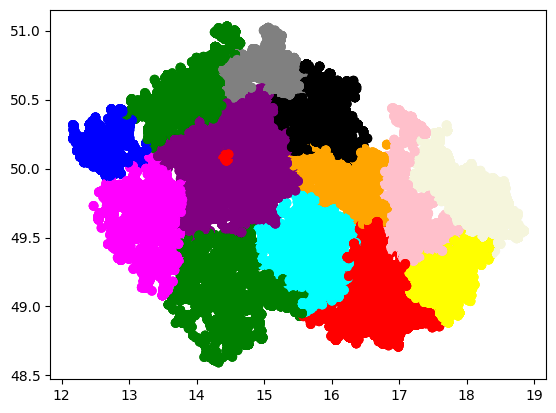

In [16]:
fig, ax = plt.subplots()
colors = {'Hlavní město Praha':"red", 'Zlínský kraj':"yellow", 'Ústecký kraj':"green",
       'Olomoucký kraj':"pink", 'Středočeský kraj':"purple", 'Královéhradecký kraj':"black",
       'Pardubický kraj':"orange", 'Moravskoslezský kraj':"beige", 'Liberecký kraj':"gray",
       'Jihočeský kraj':"green", 'Plzeňský kraj':"magenta", 'Kraj Vysočina':"cyan",
       'Jihomoravský kraj':"red", 'Karlovarský kraj':"blue"}
ax.scatter(data['x'], data['y'], c=data['Kraje'].map(colors))
plt.show()